# Hot Ones - Game Show Strategy, Hot Sauce Review, and Hot Sauce Ingredient Inspection

# Summary Slide Deck / Dashboard (Google Sheets): 
https://docs.google.com/presentation/d/1JkuENRcwFh98emu-URmJvM2m16rnkLYCWFWNNzVKjoE/edit?usp=sharing

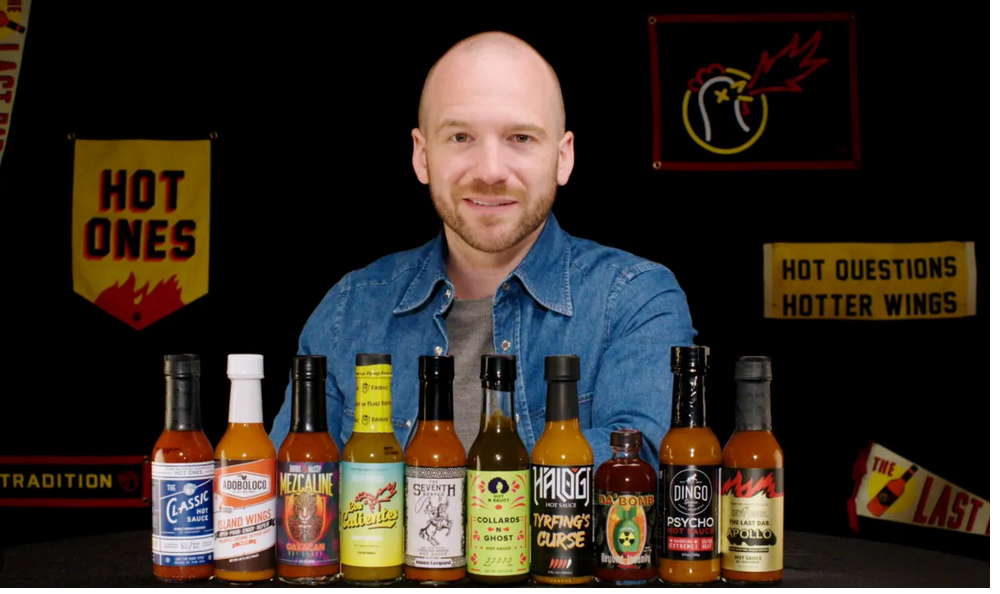

https://www.youtube.com/watch?v=1vzU_yMu4XE&embeds_euri=https%3A%2F%2Fwww.argusleader.com%2F&embeds_origin=https%3A%2F%2Fwww.argusleader.com&feature=emb_logo

## Motivation - "Hot Questions, Hotter Wings"

**Hot Ones** is a YouTube famous interview program. The show stands out as an interview program because of the level of care and research that goes into its questions. The guests are treated as real people, and the questions are thoughtful, fun, individualized, and personal.

The "catch" of the show is that these celebrities are asked this questions while eating 10 chicken (or vegan/plant-based) wings covered in hot sauce of increasing spiciness. Guests often become more vulnerable and sincere when inundated with "heat"

While it is arguable that at least a few of the sauces on the list are there for "pain" purposes alone, the sauces cover a huge range of flavor profiles with creative flavor combinations of different vegetables, fruits, vinegars, and spices - as well as varying scoville levels (scovile heat units [SHU] or scoville rating is a quatification of "heat" based on concentration of capsaicinoids - *Wikipedia*). If a hot sauce is unique, high quality, and/or extremely spicy - getting on this show is a major achievment. Thus, this analysis will assume that the hot sauces that appear on this program are ***the best of the best!***

Each season (currently 20 as of 3/25/2023) the list of hot sauces change, however many sauces/brands stay for a few seasons. **Hot Ones** also have a line of hot sauces that are featured each season (usually one "mild" and one very spicy sauce per season).

I love specialty hot sauces and even make my own. The motivation here was to analyze some of the best hot sauces for inspiration in my own hot sauce making, as well as to decide which sauces to buy and try next!

This exploritory analytics project is designed to investigate a few key topics:
1. How does SHU evolve with the order that the wings are served? 
2. What are the most popular sauces and brands used on the program?
3. Which peppers and/or ingredients are most common or unique among the hot sauces featured?

**Data**: https://www.saucemania.com.au/hot-sauce/a-complete-list-of-hot-ones-hot-sauces/

**Many of the hotsauce ingredient lists**: https://heatonist.com/?utm_source=google&utm_medium=cpc&utm_campaign=us_all_gs_ua_x_20230301_brand_purchase&utm_content=us_all_gs_kw_brand-SKAGheatonist_x_xx_purchase&utm_term=heatonist&gclid=Cj0KCQjwt_qgBhDFARIsABcDjOdxPC-EnemuphyUoO6Y6PDhcOwRSFh0ByyXEVoKaJ8IBMAl33XN2k8aAkWREALw_wcB

I started by taking this data table online to get the hot sauces from each season of the show, which includes the approximate scoville unit (SHU) and the order when the sauce appears during the interview. A few sauces have approximate (2,000,000+) or *TBA* values that were assigned 2,000,000 - as this value far exceeded the sauces that came before. In the analysis later SHU is best presented in a logarithmic scale, so splitting hairs on the exact SHU at this high end.

There does not appear to be a great repository for all of the ingredient lists of hot sauces. Given the short list of sauces (<150), web scraping would not have been ideal or necessarily worthwhile to design. Most were easy to find through Heatonist (link above), however perhaps a majority of them were individually Google searched. 

Ingredient lists are chaotic to say the least. There is little convention in spelling/plurality (*jalapeno*, *jalapeño*, vs. *jalapenos*), some ingredients have sub-ingredient lists, and peppers that have been fermented may be listed as a mash, e.g. "Habanero mash (habaneros, vinegar, salt)" - all leading to extremely tedious conditions that needed to be investigated on a case-by-case basis. As this is intended to just be a "for-fun" exploratory analysis, there are expected uncertainties present in this data - although there was a ton of care and patience to minimize that as much as reasonable/possible (too much if you ask me!)

# Load In Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df_show = pd.read_csv('HotOnesSauces.csv') #show info
df_ingr = pd.read_csv('HotOnesSauces_Ingredients.csv') #ingredient lists
df_peppernames = pd.read_csv('PepperNames.csv') #list of how peppers appear in data
df_newpeppernames = pd.read_csv('NewPepperNames.csv') #ideal list of pepper names after cleaning

df_fruitnames = pd.read_csv('fruitnames.csv') #ideal list of fruit names after cleaning
df_vegnames = pd.read_csv('vegetablenames.csv') #ideal list of veg names after cleaning

In [3]:
peppernames = df_peppernames['Pepper Names'].iloc[:].values
new_peppernames = df_newpeppernames['Pepper Names'].iloc[:].values
fruitnames = df_fruitnames['Fruit Names'].iloc[:].values
vegnames = df_vegnames['Vegetable Names'].iloc[:].values

#sweetenernames=np.array(['agave', 'cane', 'caramel', 'corn', 'honey', 'maple', 
                         #'molasses', 'sugar', 'syrup', 'turbinado'])

sweetenernames=np.array(['agave', 'brown sugar', 'cane sugar', 'corn syrup', 'honey', 'maple syrup', 
                         'molasses', 'white sugar', 'turbinado sugar'])

In [4]:
HotSauceNames = df_ingr['Hot Sauce'].iloc[:].values

In [5]:
# Since Scoville units scale quite a lot, create a log scale
#df_show['Log10 Scoville Rating (SHU)'] = np.log10(df_show['Scoville Rating (SHU)'].iloc[:].values)

In [6]:
df_ingr=df_ingr.merge(df_show.drop(['Order Served','Season'],axis=1).drop_duplicates('Hot Sauce',keep='first'),
                       how='left', on='Hot Sauce')

In [7]:
df_ingr.shape

(135, 4)

In [8]:
df = df_show.merge(df_ingr.drop(['Scoville Rating (SHU)'],axis=1), how='left',on='Hot Sauce') #add ingredients to main table

In [9]:
#I need to add this list to a data frame later, so I'm defining it here to corresponds to HotSauceNames list

HotSauceSHU = df_ingr['Scoville Rating (SHU)'].iloc[:].values #corresponds to HotSauceNames

# Which Sauces Show Up The Most Times?

In [10]:
df_show[df_show['Order Served'] == 9][['Hot Sauce','Scoville Rating (SHU)']].sort_values(by='Scoville Rating (SHU)')

,Hot Sauce,Scoville Rating (SHU)
8,Dave's Gourmet Insanity Hot Sauce,180000
18,Mad Dog 357 Hot Sauce,357000
28,Mad Dog 357 Hot Sauce,357000
38,Blair's Mega Death Sauce,550000
58,Hellfire Fiery Fool Hot Sauce,550000
68,Burns & McCoy Exhorresco Hot Sauce,625000
198,Butterfly Bakery of Vermont Taco Vibes Only Ho...,638000
188,Puckerbutt Pepper Company Unique Garlique Hot ...,642000
148,Karma Sauce Scorpion Disco Hot Sauce,649000
118,Chile Monoloco Pierde Almas Hot Sauce,665000


In [11]:
HotSauceCounts = HotSauceNames.copy()

In [12]:
#pepsum = bow_max1[new_peppernames].sum(axis=0)

for i in range(len(HotSauceNames)):
    ll = len(df[df['Hot Sauce'] == HotSauceNames[i]])
    HotSauceCounts[i] = ll
    #if ll > 1:
    #    print(ll,'x', HotSauceNames[i])
    
HotSauceCounts = HotSauceCounts.astype('int32')

In [13]:
df_ingr['# of Seasons'] = HotSauceCounts
#d_pepper_sum = {'Pepper Names': new_peppernames, 'Total Occurances': pepsum, '% of Occurances': round(10*pepsum/nhot*100)/10}

In [14]:
df_ingr.shape

(135, 5)

In [15]:
df_ingr[['Hot Sauce','Brand Name','# of Seasons']].sort_values(by=['# of Seasons'],ascending=False).head(12)

,Hot Sauce,Brand Name,# of Seasons
30,Da' Bomb Beyond Insanity Hot Sauce,Da' Bomb,19
71,Hot Ones The Classic Hot Sauce,Hot Ones,9
72,Hot Ones The Last Dab Apollo Hot Sauce,Hot Ones,8
66,Hot Ones Los Calientes Hot Sauce,Hot Ones,5
67,Hot Ones Los Calientes Rojo Hot Sauce,Hot Ones,5
74,Hot Ones The Last Dab Reduxx,Hot Ones,4
64,Hot Ones Fiery Chipotle Hot Sauce,Hot Ones,4
75,Hot Ones The Last Dab XXX Hot Sauce,Hot Ones,3
70,Hot Ones The Classic Garlic Fresno Hot Sauce,Hot Ones,3
9,Blair's Mega Death Sauce,Blair's,3


In [16]:
topsauces = df_ingr.copy()

topsauces = topsauces.set_index(topsauces['Hot Sauce'])

topsauces[['Brand Name','# of Seasons']].sort_values(by=['# of Seasons'],ascending=False).head(8)

,Brand Name,# of Seasons
Hot Sauce,,
Da' Bomb Beyond Insanity Hot Sauce,Da' Bomb,19
Hot Ones The Classic Hot Sauce,Hot Ones,9
Hot Ones The Last Dab Apollo Hot Sauce,Hot Ones,8
Hot Ones Los Calientes Hot Sauce,Hot Ones,5
Hot Ones Los Calientes Rojo Hot Sauce,Hot Ones,5
Hot Ones The Last Dab Reduxx,Hot Ones,4
Hot Ones Fiery Chipotle Hot Sauce,Hot Ones,4
Hot Ones The Last Dab XXX Hot Sauce,Hot Ones,3


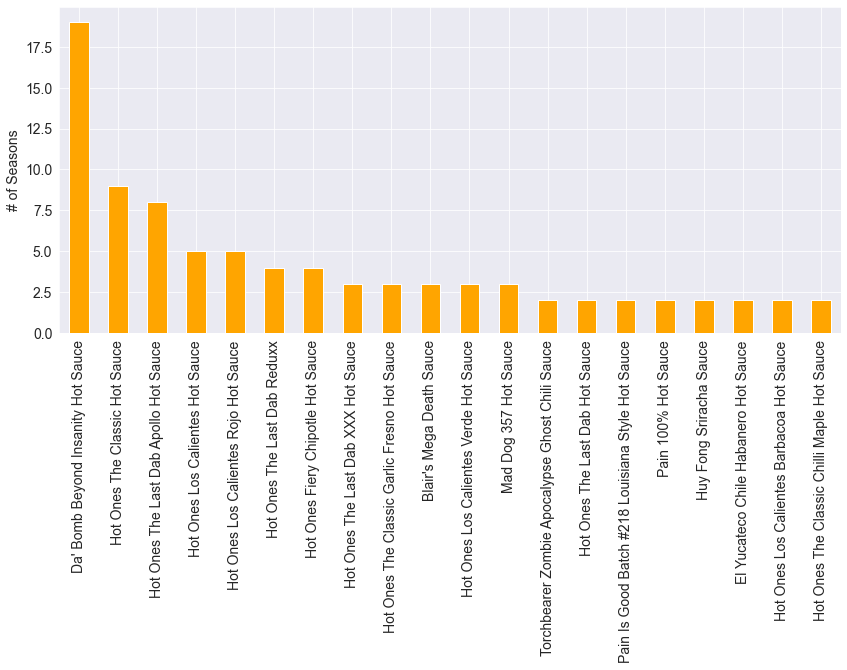

In [17]:
plt.rcParams.update({'font.size': 14})

topsauces[['Brand Name','# of Seasons']].sort_values(by=['# of Seasons'],
                                                      ascending=False).head(20).plot(kind='bar', color='orange', legend=False, figsize=(14,6))

plt.ylabel('# of Seasons')
plt.xlabel('')

plt.show()

In [18]:
no_hotones = df_ingr[df_ingr['Brand Name'] != 'Hot Ones'].copy()

#no_hotones = no_hotones.set_index(no_hotones['Hot Sauce'])

no_hotones[['Hot Sauce', 'Brand Name','# of Seasons']].sort_values(by=['# of Seasons'],ascending=False).head(8)

,Hot Sauce,Brand Name,# of Seasons
30,Da' Bomb Beyond Insanity Hot Sauce,Da' Bomb,19
9,Blair's Mega Death Sauce,Blair's,3
88,Mad Dog 357 Hot Sauce,Mad Dog,3
81,Huy Fong Sriracha Sauce,Huy Fong,2
94,Pain Is Good Batch #218 Louisiana Style Hot Sauce,Spicin Foods,2
41,El Yucateco Chile Habanero Hot Sauce,El Yucateco,2
93,Pain 100% Hot Sauce,Pain 100%,2
130,Torchbearer Zombie Apocalypse Ghost Chili Sauce,Torchbearer Sauces,2


In [19]:
#no_hotones['# of Seasons'].sort_values(by=['# of Seasons'],ascending=False).head(10).plot(kind='bar',figsize=(8, 6), color='orange')

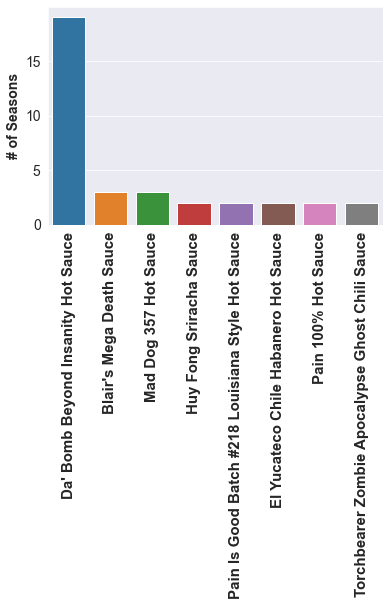

In [20]:
'''
plt.rcParams.update({'font.size': 14})

no_hotones[['Brand Name','# of Seasons']].sort_values(by=['# of Seasons'],
                                                      ascending=False).head(8).plot(kind='bar', color='orange', legend=False, figsize=(14,6))

plt.ylabel('# of Seasons')
plt.xlabel('')

plt.ylim(0,20)
'''

#plt.rcParams.update({'font.size': 14})

#sns.set(rc={'figure.figsize':(11,9)})


sns.barplot(data=no_hotones[['Hot Sauce','# of Seasons']].sort_values(by=['# of Seasons'], ascending=False).head(8),
            x='Hot Sauce', y='# of Seasons')

plt.ylabel('# of Seasons', weight='bold')
plt.xlabel('')
plt.xticks(rotation=90, weight='bold', size=15)
plt.show()

# Most Popular Brands

In [21]:
brandnames = df_ingr['Brand Name'].unique()
n_brandnames = brandnames.copy()
#count number of seasons, noting a sauce company could show up more than once
n_seasons = brandnames.copy()

#df_ingr[df_ingr['Brand Name'] == brandnames[0]]

#len(df[df['Brand Name']==brandnames[68]]['Season'].unique()) #number of unique seasons a hot sauce company shows up
for i in range(len(brandnames)):
    nb = len(df_ingr[df_ingr['Brand Name'] == brandnames[i]])
    ns = len(df[df['Brand Name']==brandnames[i]]['Season'].unique())
    #print(nb, " ", brandnames[i])
    n_brandnames[i] = nb
    n_seasons[i] = ns
    
n_brandnames = n_brandnames.astype('int32')
n_seasons = n_seasons.astype('int32')


In [22]:
d_brandname = {'Brand Name': brandnames, 'Number of Different Sauces In Show': n_brandnames, 'Number of Seasons Present': n_seasons}#, '% of Occurances': round(10*pepsum/nhot*100)/10}
ind = np.arange(len(brandnames))
df_brandname = pd.DataFrame(data=d_brandname)#,index=ind)
#pepper_sums.set_index(ind)

## Most Popular Brands
### Which Sauces Show Up In the Most Seasons

In [23]:
#df_brandname[['Brand Name','Number of Seasons Present']].sort_values(by=['Number of Seasons Present'],ascending=False).head(10)

mostseasons = df_brandname[['Brand Name','Number of Seasons Present']].copy()


mostseasons = mostseasons.set_index(mostseasons['Brand Name'])


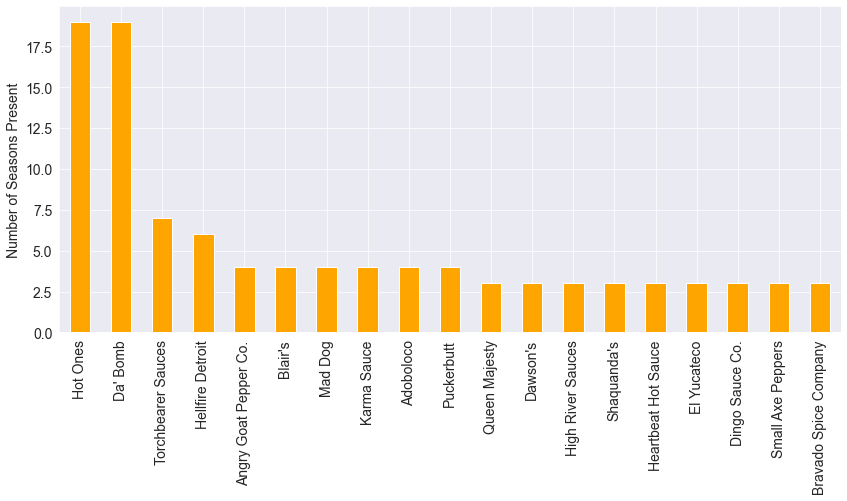

In [24]:
plt.rcParams.update({'font.size': 14})

mostseasons.sort_values(by=['Number of Seasons Present'],
                        ascending=False).head(19).plot(kind='bar', color='orange', legend=False, figsize=(14,6))

plt.ylabel('Number of Seasons Present')
plt.xlabel('')

plt.show()

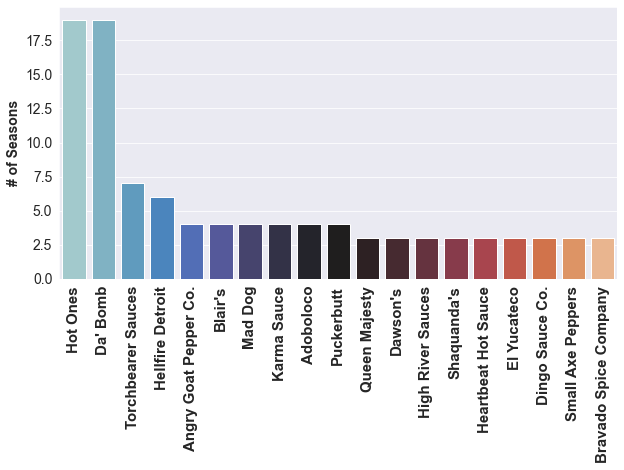

In [25]:
plt.rcParams['figure.figsize']=(10,5)


sns.barplot(data=mostseasons.sort_values(by=['Number of Seasons Present'],
                        ascending=False).head(19), x='Brand Name', y='Number of Seasons Present', palette="icefire")


sns.figsize=(40, 10)
#sns.figsize = (10,5)

plt.ylabel('# of Seasons', weight='bold')
plt.xlabel('')
plt.xticks(rotation=90, weight='bold', size=15)
plt.show()

## Most Popular Brands
### Which Brands Have the Most Sauces Present

In [26]:
diffsauces = df_brandname[['Brand Name','Number of Different Sauces In Show']].copy()


diffsauces = diffsauces.set_index(mostseasons['Brand Name'])

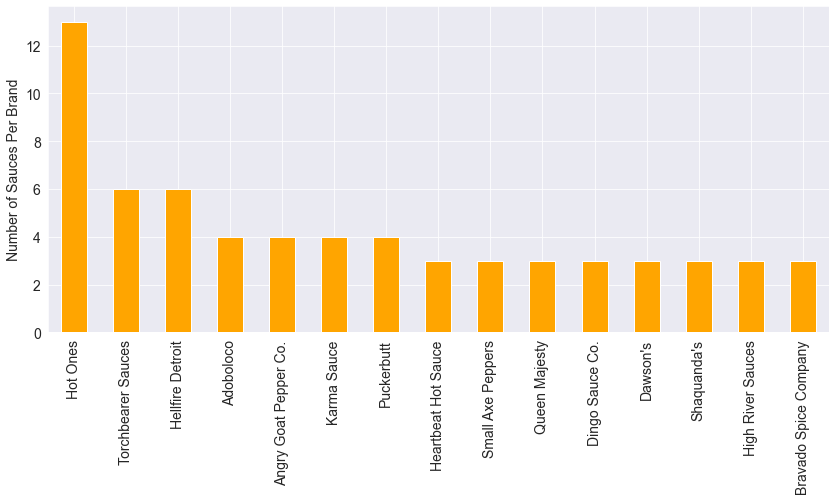

In [27]:
#diffsauces.sort_values(by=['Number of Different Sauces In Show'],ascending=False).head(15)
plt.rcParams.update({'font.size': 14})

plt.figsize=(20,20)

diffsauces.sort_values(by=['Number of Different Sauces In Show'],
                       ascending=False).head(15).plot(kind='bar', 
                                                     color='orange',
                                                    legend=False,
                                                    figsize=(14,6))

plt.ylabel('Number of Sauces Per Brand')
plt.xlabel('')

plt.show()


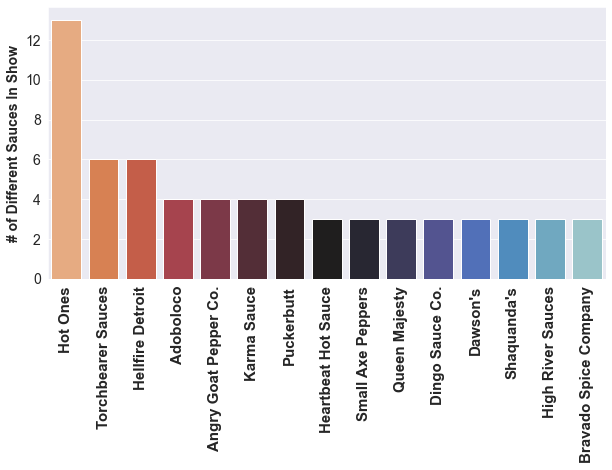

In [28]:
plt.rcParams['figure.figsize']=(10,5)


sns.barplot(data=diffsauces.sort_values(by=['Number of Different Sauces In Show'],
                        ascending=False).head(15), x='Brand Name', y='Number of Different Sauces In Show', palette="icefire_r")


sns.figsize=(40, 10)
#sns.figsize = (10,5)

plt.ylabel('# of Different Sauces In Show', weight='bold')
plt.xlabel('')
plt.xticks(rotation=90, weight='bold', size=15)
plt.show()

In [29]:
#count number of seasons, noting a sauce company could show up more than once
n_seasons = brandnames.copy()


In [30]:
len(df[df['Brand Name']==brandnames[68]]['Season'].unique()) #number of unique seasons a hot sauce company shows up

7

# How does SHU increase with Serving Order?

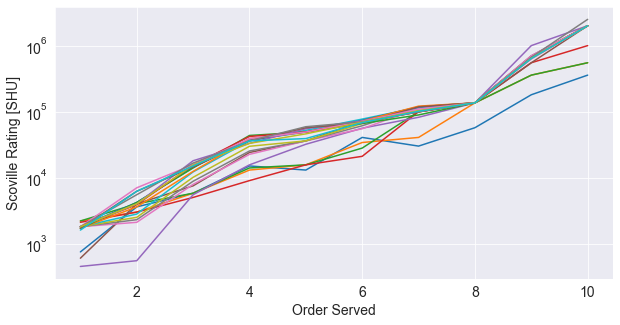

In [31]:
#n = len(df[df['Season']==1]['Scoville Rating (SHU)'])
n=len(df['Season'].unique())

for i in range(n):
    plt.plot(df[df['Season']==i+1]['Order Served'], df[df['Season']==i+1]['Scoville Rating (SHU)'], label=r'Season'+str(i+1))


plt.yscale('log')
plt.ylabel('Scoville Rating [SHU]')
plt.xlabel('Order Served')
#plt.legend()
plt.show()

In [32]:
labels = df['Order Served'].unique()
n = len(labels)
med_scov_per_order = 0.*np.arange(n)
mean_scov_per_order = 0.*np.arange(n)
std_scov_per_order = 0.*np.arange(n)

In [33]:
for i in range(n):
    med_scov_per_order[i] = df[df['Order Served']==labels[i]]['Scoville Rating (SHU)'].median()
    mean_scov_per_order[i] = df[df['Order Served']==labels[i]]['Scoville Rating (SHU)'].mean()
    std_scov_per_order[i] = df[df['Order Served']==labels[i]]['Scoville Rating (SHU)'].std()

    #print('Order Served = ',i)
    #print('Mean =',df[df['Order Served']==i]['Scoville Rating (SHU)'].mean())
    #print('Median =',df[df['Order Served']==i]['Scoville Rating (SHU)'].median())
    #print('    ')

#med_scov_per_order

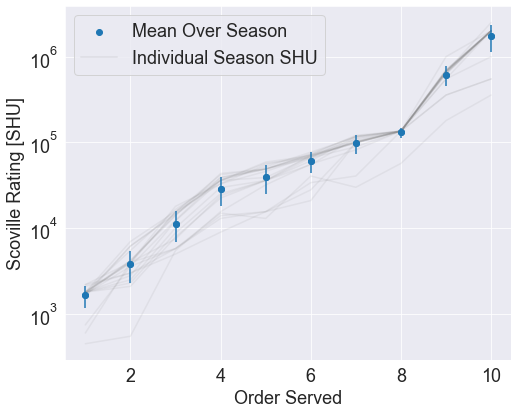

In [34]:
plt.rcParams.update({'font.size': 18})

plt.figure(figsize=(8,6.5))

n=len(df['Season'].unique())

#plot individual ones in background
for i in range(n):
    plt.plot(df[df['Season']==i+1]['Order Served'], df[df['Season']==i+1]['Scoville Rating (SHU)'],
             alpha=0.1, color='tab:gray')#, label=r'Season'+str(i+1))

plt.scatter(labels, mean_scov_per_order, label='Mean Over Season')#, label=r'Season'+str(i+1))
plt.errorbar(labels, mean_scov_per_order, yerr = std_scov_per_order, fmt ='o')
plt.plot(df[df['Season']==i+1]['Order Served'], df[df['Season']==i+1]['Scoville Rating (SHU)']*0, 
         alpha=0.1, color='tab:gray', lw=2, label='Individual Season SHU') #plot one for the legend label

#plt.title('Pizza')
plt.yscale('log')
plt.ylabel('Scoville Rating [SHU]')
plt.xlabel('Order Served')
plt.legend()
plt.show()

In [35]:
df[df['Order Served']==8][['Hot Sauce','Season']]

,Hot Sauce,Season
7,Dave's Gourmet Temporary Insanity Hot Sauce,1
17,Da' Bomb Beyond Insanity Hot Sauce,2
27,Da' Bomb Beyond Insanity Hot Sauce,3
37,Da' Bomb Beyond Insanity Hot Sauce,4
47,Da' Bomb Beyond Insanity Hot Sauce,5
57,Da' Bomb Beyond Insanity Hot Sauce,6
67,Da' Bomb Beyond Insanity Hot Sauce,7
77,Da' Bomb Beyond Insanity Hot Sauce,8
87,Da' Bomb Beyond Insanity Hot Sauce,9
97,Da' Bomb Beyond Insanity Hot Sauce,10


# Ingredient Inspection
## String Processing on Ingredients

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
thecount=CountVectorizer()

In [37]:
ingr = df_ingr['Ingredients'].iloc[:].values
ingr = thecount.fit_transform(ingr)

In [38]:
cols = thecount.get_feature_names_out()
bow = pd.DataFrame(ingr.toarray(), columns = cols)
bow.head(5)

,160000,202,211,28,30,acetic,acid,acidity,acids,added,...,wine,with,wood,worchestershire,xanthan,yeast,yellow,yuzu,zest,zing
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
#get rid of number columns
cols = cols[5:]
bow = bow[cols]

In [40]:
bow[peppernames]

,adobo,aji,aka,amarillo,anaheim,ancho,apollo,arbol,bell,bhut,...,pot,primo,reaper,reapers,scorpion,scotch,serrano,sivathei,tabasco,tepin
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
131,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
132,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,1,0,0,0,0,0
133,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1


## Ingredient Inspection

### What Peppers Are Most Common? - Counting Issues....
Peppers with two-word names, e.g. *bhut jolokia*, have been split. We want to combine these into one element.

Some peppers have been listed sometimes singular and sometimes plural, e.g. *jalapenos* and *jalapenos*. We want to combine these into one element.

Some peppers have *ñ* written as *n*, e.g. *jalapeno* and *jalapeño*. We want to combine these into one element.

In order to calculate the number of sauces that contain a certain pepper, we want to count a maximum number of 1 counts in any pepper row. Sometimes a pepper's name shows up more than once on a label, in two common ways:
1. jalapeno pepper mash (jalapenos, salt, vinegar...)
2. habanero peppers,..., habanero pepper extract,...

In [41]:
#by inspection

bhut = np.array(['bhut','jolokia', 'ghost']) #Ghost / Bhut Jolokia
choc = np.array(['chocolate', 'bhutlah']) #Chocolate Bhutlah
fijian = np.array(['fijian', 'bongo']) # fijian bongo
bonnet = np.array(['scotch', 'bonnet','bonnets']) # scotch bonnet
reaper = np.array(['carolina', 'reaper', 'reapers']) # carolina reaper
pot7 = np.array(['pot', 'douglah']) #7-pot / douglah
jalapeno = np.array(['jalapeno', 'jalapenos', 'jalapeño', 'jalapeños']) # jalapeno
habanero = np.array(['habanero', 'habaneros', 'habañero']) # habanero 
chipotle = np.array(['chipotle', 'chipolte', 'chipotles']) # chipotle
chili = np.array(['chili', 'chilli','chile','chiles','chilies','chillies'])

apples = np.array(['apples', 'granny', 'smith']) #apple goes with apple cider vinegar
banana = np.array(['banana', 'bananas'])
blueberry = np.array(['blueberry', 'blue', 'berries'])
orange = np.array(['orange', 'mandarin', 'oranges'])
mango = np.array(['mango', 'mangoes', 'mangos'])
#peaches = np.array(['peach', 'peaches'])
pineapple = np.array(['pineapple', 'pinapple'])

carrot = np.array(['carrot', 'carrots'])
onion = np.array(['onion', 'onions'])
mushroom = np.array(['mushroom', 'shiitake', 'shitake'])
tomatillo = np.array(['tomatillo','tomatillos'])
tomato = np.array(['tomato','tomatoes','roma'])
squash = np.array(['squash', 'butternut'])

sugar = np.array(['sugar','sugars'])

In [42]:
bow['bhut jolokia'] = bow[bhut].max(axis=1)
bow=bow.drop(bhut,axis=1)

bow['chocolate bhutlah'] = bow[choc].max(axis=1)
bow=bow.drop(choc,axis=1)

bow['fijian bongo'] = bow[fijian].max(axis=1)
bow=bow.drop(fijian,axis=1)

bow['scotch bonnet'] = bow[bonnet].max(axis=1)
bow=bow.drop(bonnet,axis=1)

bow['carolina reaper'] = bow[reaper].max(axis=1)
bow=bow.drop(reaper,axis=1)

bow['7-pot'] = bow[pot7].max(axis=1)
bow=bow.drop(pot7,axis=1)

bow['jalapeno'] = bow[jalapeno].max(axis=1)
bow=bow.drop(jalapeno[1:],axis=1)

bow['habanero'] = bow[habanero].max(axis=1)
bow=bow.drop(habanero[1:],axis=1)

bow['chipotle'] = bow[chipotle].max(axis=1)
bow=bow.drop(chipotle[1:],axis=1)

bow['chili'] = bow[chili].max(axis=1)
bow=bow.drop(chili[1:],axis=1)

bow['apples'] = bow[apples].max(axis=1)
bow=bow.drop(apples[1:],axis=1)

bow['banana'] = bow[banana].max(axis=1)
bow=bow.drop(banana[1:],axis=1)

bow['blueberry'] = bow[blueberry].max(axis=1)
bow=bow.drop(blueberry[1:],axis=1)

bow['orange'] = bow[orange].max(axis=1)
bow=bow.drop(orange[1:],axis=1)

bow['mango'] = bow[mango].max(axis=1)
bow=bow.drop(mango[1:],axis=1)

## peach -> kind of pepper
## peaches -> fruit
#bow['peach'] = bow[peach].max(axis=1) 
#bow=bow.drop(peach[1:],axis=1)

bow['pineapple'] = bow[pineapple].max(axis=1)
bow=bow.drop(pineapple[1:],axis=1)

bow['carrot'] = bow[carrot].max(axis=1)
bow=bow.drop(carrot[1:],axis=1)

bow['onion'] = bow[onion].max(axis=1)
bow=bow.drop(onion[1:],axis=1)

bow['mushroom'] = bow[mushroom].max(axis=1)
bow=bow.drop(mushroom[1:],axis=1)

bow['tomatillo'] = bow[tomatillo].max(axis=1)
bow=bow.drop(tomatillo[1:],axis=1)

bow['tomato'] = bow[tomato].max(axis=1)
bow=bow.drop(tomato[1:],axis=1)

bow['squash'] = bow[squash].max(axis=1)
bow=bow.drop(squash[1:],axis=1)

bow['sugar'] = bow[sugar].max(axis=1)
bow=bow.drop(sugar[1:],axis=1)

bow = bow.sort_index(axis=1)

new_cols=bow.columns

In [43]:
#get rid of double+ peppers per hotsauce

bow_max1=bow.copy()

n_p = len(new_peppernames)
n_c = len(bow)
for j in range(n_c):
    for i in range(n_p):
        if bow_max1[new_peppernames[i]][j] > 1:
            #print(new_peppernames[i], " ", HotSauceNames[j], " check")
            bow_max1[new_peppernames[i]][j] = 1

In [44]:
df_peppers = df_ingr.join(bow_max1[new_peppernames])

In [45]:
nhot = len(HotSauceNames) #number of hotsauces

In [46]:
withhabanero = np.arange(nhot)*0
withcayenne = np.arange(nhot)*0
withchili = np.arange(nhot)*0

totalpeppers = np.arange(nhot)*0
habanero_dummy = df_peppers['habanero'].iloc[:].values
cayenne_dummy = df_peppers['cayenne'].iloc[:].values
chili_dummy = df_peppers['chili'].iloc[:].values


withhabanero[habanero_dummy == 1]=1
withcayenne[cayenne_dummy == 1]=1
withchili[chili_dummy == 1]=1

df_peppers['with_chili']=withchili
df_peppers['with_cayenne']=withcayenne
df_peppers['with_habanero']=withhabanero

df_peppers['totalpepperpersauce'] = df_peppers[new_peppernames].sum(axis=1)

In [47]:
new_peppernames = new_peppernames[new_peppernames != 'chili'] #chili peppers are a dummy name

In [48]:
#df_peppers.to_csv('peppercounts.csv')

In [49]:
pepsum = bow_max1[new_peppernames].sum(axis=0)
d_pepper_sum = {'Pepper Names': new_peppernames, 'Total Occurances': pepsum, '% of Occurances': round(10*pepsum/nhot*100)/10}
ind = np.arange(len(pepsum))
pepper_sums = pd.DataFrame(data=d_pepper_sum)#,index=ind)
pepper_sums=pepper_sums.set_index(ind)

## Ingredient Inspection

### What Peppers Are Most Common? - Stats & Figures

In [50]:
pepper_sums.sort_values(by=['Total Occurances'], ascending=False).head(6)

,Pepper Names,Total Occurances,% of Occurances
24,habanero,46,34.1
10,bhut jolokia,34,25.2
35,scorpion,22,16.3
26,jalapeno,20,14.8
14,carolina reaper,19,14.1
17,chipotle,15,11.1


In [51]:
pepper_sums[pepper_sums['Pepper Names']!='chili'].sort_values(by=['Total Occurances'], ascending=False).head(6)

,Pepper Names,Total Occurances,% of Occurances
24,habanero,46,34.1
10,bhut jolokia,34,25.2
35,scorpion,22,16.3
26,jalapeno,20,14.8
14,carolina reaper,19,14.1
17,chipotle,15,11.1


In [52]:
#Export a CSV with the above values for ease later.

#pepper_sums.to_csv('peppersums.csv')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 [Text(0, 0, 'habanero'),
  Text(1, 0, 'bhut jolokia'),
  Text(2, 0, 'scorpion'),
  Text(3, 0, 'jalapeno'),
  Text(4, 0, 'carolina reaper'),
  Text(5, 0, 'chipotle'),
  Text(6, 0, 'scotch bonnet'),
  Text(7, 0, 'bell'),
  Text(8, 0, 'chocolate bhutlah'),
  Text(9, 0, 'cayenne'),
  Text(10, 0, 'serrano')])

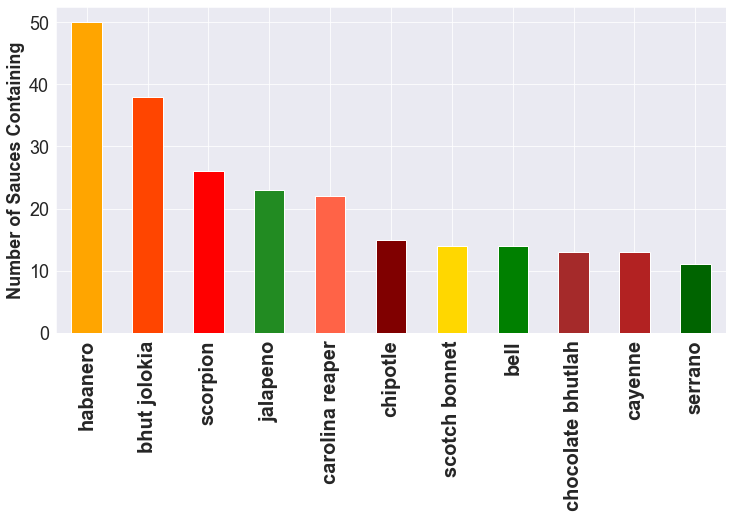

In [53]:
colors = ['orange','orangered','red','forestgreen','tomato','maroon','gold','green','brown','firebrick','darkgreen']

bow[bow[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[:11]].sum(axis=0).plot(kind='bar',figsize=(12, 6), color=colors)

sns.color_palette("rocket", as_cmap=True)

plt.ylabel('Number of Sauces Containing',weight='bold')
plt.xticks(weight='bold', size=20)

Text(0, 0.5, 'Top Peppers Coupled with Habanero')

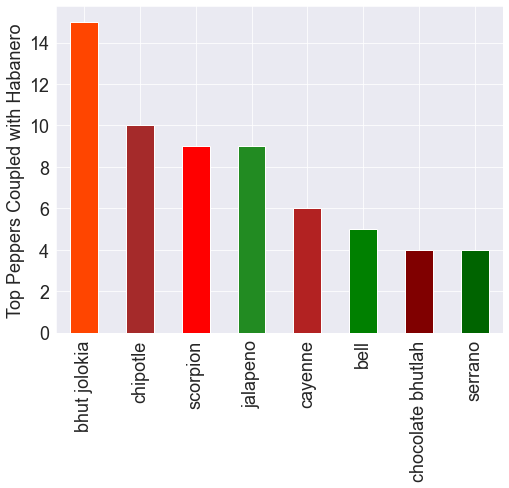

In [54]:
colors = ['orangered','brown','red','forestgreen','firebrick','green','maroon','darkgreen','tomato','gold']

bh = bow[bow['habanero']>0].copy()
bh[bh[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[1:9]].sum(axis=0).plot(kind='bar',figsize=(8, 6), color=colors)

plt.ylabel('Top Peppers Coupled with Habanero')

([<matplotlib.patches.Wedge at 0x7fc17f929b50>,
 [Text(0.2850718163776404, 1.0624189660897216, 'Chipotle'),
  Text(-0.28507181637764123, -1.0624189660897214, '')],
 [Text(0.15549371802416748, 0.5795012542307572, '11%'),
  Text(-0.15549371802416792, -0.579501254230757, '89%')])

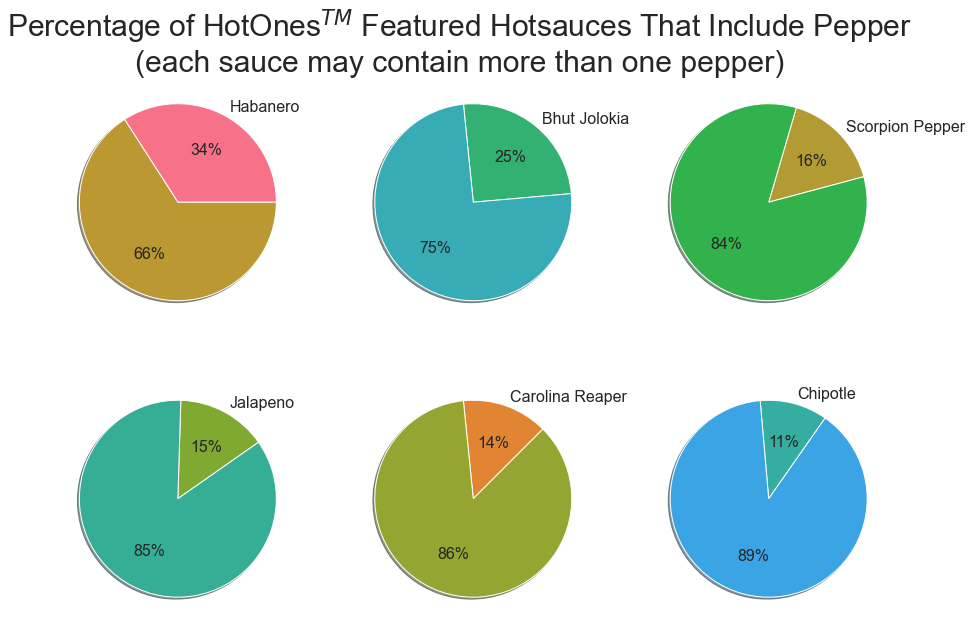

In [55]:
from textwrap import wrap

plt.rcParams.update({'font.size': 16})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))#, facecolor='#e8f4f0')
#fig.delaxes(ax=axes[0,1])
#fig.delaxes(ax=axes[1,1])
#sns.color_palette('husl')

fig.suptitle("\n".join(wrap(r'Percentage of HotOnes$^{TM}$ Featured Hotsauces That Include Pepper (each sauce may contain more than one pepper)')),
             fontsize=30)

sauces_with_habanero = pepper_sums[pepper_sums['Pepper Names']=='habanero']['% of Occurances'].iloc[:].values
axes[0,0].pie([sauces_with_habanero[0], 100. - sauces_with_habanero[0]], labels = ['Habanero',''], 
        colors = sns.husl_palette(), shadow = True, autopct='%.0f%%')

sauces_with_bhut = pepper_sums[pepper_sums['Pepper Names']=='bhut jolokia']['% of Occurances'].iloc[:].values
axes[0,1].pie([sauces_with_bhut[0], 100. - sauces_with_bhut[0]], labels = ['Bhut Jolokia',''], 
        colors = sns.husl_palette(h=0.4), shadow = True, autopct='%.0f%%', startangle=5)

sauces_with_scorpion = pepper_sums[pepper_sums['Pepper Names']=='scorpion']['% of Occurances'].iloc[:].values
axes[0,2].pie([sauces_with_scorpion[0], 100. - sauces_with_scorpion[0]], labels = ['Scorpion Pepper',''], 
        colors = sns.husl_palette(h=0.2), shadow = True, autopct='%.0f%%', startangle=15)

sauces_with_jalapeno = pepper_sums[pepper_sums['Pepper Names']=='jalapeno']['% of Occurances'].iloc[:].values
axes[1,0].pie([sauces_with_jalapeno[0], 100. - sauces_with_jalapeno[0]], labels = ['Jalapeno',''], 
        colors = sns.husl_palette(h=0.3), shadow = True, autopct='%.0f%%', startangle=35)

sauces_with_reaper = pepper_sums[pepper_sums['Pepper Names']=='carolina reaper']['% of Occurances'].iloc[:].values
axes[1,1].pie([sauces_with_reaper[0], 100. - sauces_with_reaper[0]], labels = ['Carolina Reaper',''], 
        colors = sns.husl_palette(h=0.1), shadow = True, autopct='%.0f%%', startangle=45)

sauces_with_chipotle = pepper_sums[pepper_sums['Pepper Names']=='chipotle']['% of Occurances'].iloc[:].values
axes[1,2].pie([sauces_with_chipotle[0], 100. - sauces_with_chipotle[0]], labels = ['Chipotle',''], 
        colors = sns.husl_palette(h=0.5), shadow = True, autopct='%.0f%%', startangle=55)

#fig.delaxes(ax=axes[1,1])
#perc_bv = sum(bv)/nhot
#axes[1,1].pie([perc_bv, 1.-perc_bv], labels = ['Balsamic Vinegar',''], 
#        colors = sns.color_palette('viridis'), autopct='%.0f%%', shadow = True, startangle=45)#, labeldistance=0.5)

## Ingredient Inspection

### White Vinegar vs. Apple Cider Vinegar - Sorting & Figures

##### Sorting Issues...

*apple, cider, vinegar* all separated

Sometimes only ingredient is *vinegar* - assume in these cases *white*

Count *distilled vinegar* as *white*.

Occasional variations, *wine vinegar*, *balsamic vinegar*,...

*apple* and *cider* nearly always show up together, at least one case where just "cider" vinegar is present

*Vinegar* might show up more than once if used in a 'mash', which is sometimes a pre-sauce or mixture.

In [56]:
bow_wnames = bow.copy()
bow_wnames = bow.set_index(HotSauceNames)

In [57]:
bow_wnames['Scoville Rating (SHU)'] = HotSauceSHU

In [58]:
#check each sauce, is there apple cider vinegar? - both "cider" and at least 1 "vinegar"
nhot = len(HotSauceNames)
acv = 0.*bow_wnames['cider'].iloc[:].values.copy() #apple cider vinegar
rwv = 0.*bow_wnames['wine'].iloc[:].values.copy() #red wine vinegar
bv = 0.*bow_wnames['balsamic'].iloc[:].values.copy() #balsamic vinegar
wdv = 0.*bow_wnames['vinegar'].iloc[:].values.copy() #white distilled vinegar

In [59]:
for i in range(nhot):
    n_acv = bow_wnames['cider'][i]
    if n_acv > 0:
        acv[i] = 1
    n_rwv = bow_wnames['wine'][i]
    if n_rwv > 0:
        rwv[i] = 1
    n_bv = bow_wnames['balsamic'][i]
    if n_bv > 0:
        bv[i] = 1
    nv = bow_wnames['vinegar'][i]
    if nv > 0:
        wdv[i] = nv - bv[i] - rwv[i] - acv[i] #make sure to remove other vinegars
        if wdv[i] > 1: #sometimes white vinegar still shows up more than once
            wdv[i] = 1
        if wdv[i] < 1: #a few cases this goes negative, I haven't had a chance to look into the whys
            wdv[i] = 0

In [60]:
bow_wnames = bow_wnames.drop(['cider','wine','balsamic','vinegar'],axis=1)

bow_wnames['apple cider vinegar'] = acv
bow_wnames['red wine vinegar'] = rwv
bow_wnames['balsamic vinegar'] = bv
bow_wnames['white vinegar'] = wdv

vinegarnames=np.array(['apple cider vinegar','balsamic vinegar','red wine vinegar','white vinegar'])

bow_wnames = bow_wnames.sort_index(axis=1)

In [61]:
bh = bow_wnames[bow_wnames['habanero'] > 0]

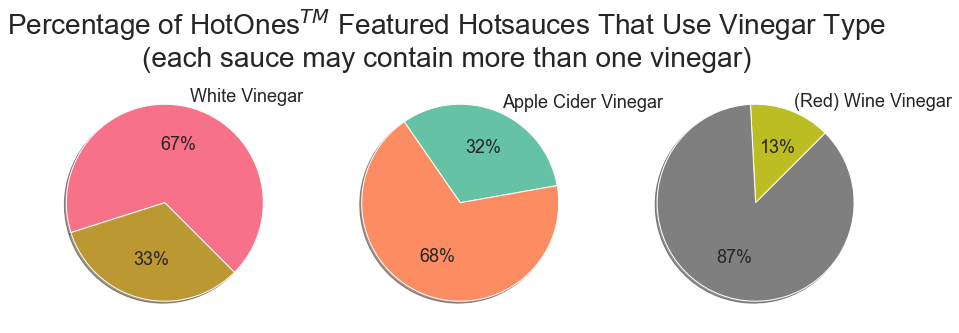

In [62]:
plt.rcParams.update({'font.size': 18})

fig, axes = plt.subplots(2, 3, figsize=(15, 10))#, facecolor='#e8f4f0')
#fig.delaxes(ax=axes[0,1])
#fig.delaxes(ax=axes[1,1])

fig.suptitle("\n".join(wrap(r'Percentage of HotOnes$^{TM}$ Featured Hotsauces That Use Vinegar Type (each sauce may contain more than one vinegar)')),
             fontsize=28)

perc_wdv = sum(wdv)/nhot
axes[0,0].pie([perc_wdv, 1.-perc_wdv], labels = ['White Vinegar',''], 
        colors = sns.color_palette('husl'), shadow = True, autopct='%.0f%%', startangle=-45)


perc_acv = sum(acv)/nhot
axes[0,1].pie([perc_acv, 1.-perc_acv], labels = ['Apple Cider Vinegar',''], 
        colors = sns.color_palette('Set2'), shadow = True, autopct='%.0f%%', startangle=10)

perc_rwv = sum(rwv)/nhot
axes[0,2].pie([perc_rwv, 1.-perc_rwv], labels = ['(Red) Wine Vinegar',''], 
        colors = sns.color_palette("tab10_r"), shadow = True, autopct='%.0f%%', startangle=45)


fig.delaxes(ax=axes[1,0])
fig.delaxes(ax=axes[1,1])
fig.delaxes(ax=axes[1,2])
#perc_bv = sum(bv)/nhot
#axes[1,1].pie([perc_bv, 1.-perc_bv], labels = ['Balsamic Vinegar',''], 
#        colors = sns.color_palette('viridis'), autopct='%.0f%%', shadow = True, startangle=45)#, labeldistance=0.5)#, autopct='%.0f%%')

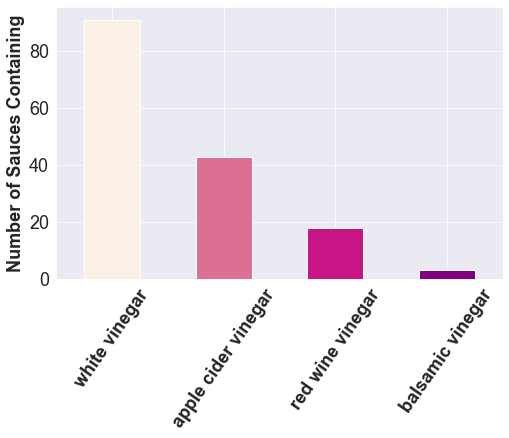

In [63]:
plt.rcParams['figure.figsize']=(8,5)

bow_wnames[bow_wnames[vinegarnames].sum(axis=0).sort_values(ascending=False)
    .index[:15]].sum(axis=0).plot(kind='bar',color=['linen','palevioletred','mediumvioletred','purple'])

plt.ylabel('Number of Sauces Containing', weight='bold')


plt.xlabel('')
plt.xticks(rotation=55, weight='bold', size=18)
plt.show()

In [64]:
bow_wnames[vinegarnames].sum(axis=0).sort_values(ascending=False)

white vinegar          91.0
apple cider vinegar    43.0
red wine vinegar       18.0
balsamic vinegar        3.0
dtype: float64

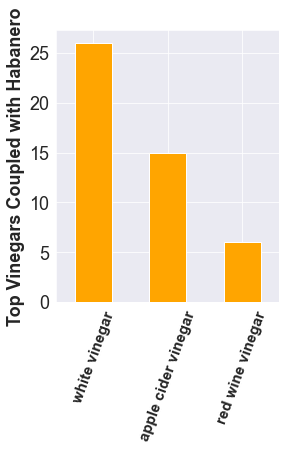

In [65]:
plt.rcParams['figure.figsize']=(4,5)

bh[bh[vinegarnames].sum(axis=0).sort_values(ascending=False)
    .index[:3]].sum(axis=0).plot(kind='bar', color='orange')

plt.ylabel('Top Vinegars Coupled with Habanero', weight='bold')


plt.xlabel('')
plt.xticks(rotation=70, weight='bold', size=15)
plt.show()

Text(0, 0.5, 'Top Peppers Coupled with Habanero')

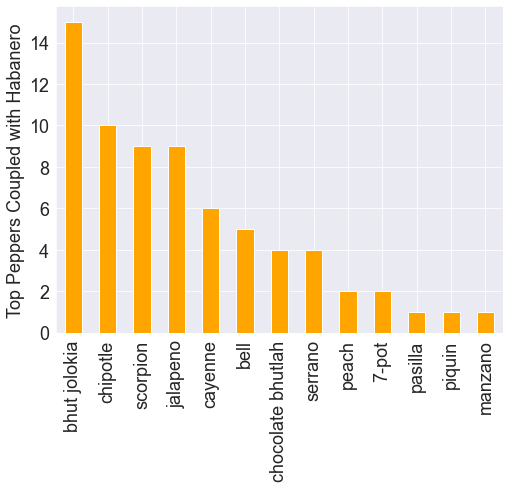

In [66]:
bh[bh[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[1:14]].sum(axis=0).plot(kind='bar',figsize=(8, 6), color='orange')

plt.ylabel('Top Peppers Coupled with Habanero')

## Ingredient Inspection

### Sugar and Sweetners - Sorting & Figures

- corn, maple, agave syrups all double list as syrup
- terbinado, cane, 

In [67]:
'''
agave
brown
cane
corn
sugar
syrup
turbinado
vermont
'''
agave = 0.*bow_wnames['agave'].iloc[:].values.copy() 
brown = 0.*bow_wnames['brown'].iloc[:].values.copy() 
cane = 0.*bow_wnames['cane'].iloc[:].values.copy()
corn = 0.*bow_wnames['corn'].iloc[:].values.copy()
maple = 0.*bow_wnames['maple'].iloc[:].values.copy() 
sugar = 0.*bow_wnames['sugar'].iloc[:].values.copy() 
turbinado = 0.*bow_wnames['turbinado'].iloc[:].values.copy()
syrup = 0.*bow_wnames['syrup'].iloc[:].values.copy() 

In [68]:
#deal with syrup
for i in range(nhot):
    #deal with syrup
    n_syrup = bow_wnames['syrup'][i]
    n_agave = bow_wnames['agave'][i]
    n_maple = bow_wnames['maple'][i]
    n_corn = bow_wnames['corn'][i]
    if n_syrup > 0:
        if n_maple > 0:
            maple[i] = 1
        if n_agave > 0:
            agave[i] = 1
        if n_corn > 0.:
            corn[i] = 1
            #print(i, ' has corn syrup')
        if (n_maple > 0) & (n_agave > 0):
            print(i, ' has both syrups')
    n_sugar = bow_wnames['sugar'][i]
    n_cane = bow_wnames['cane'][i]
    n_turbinado = bow_wnames['turbinado'][i]
    n_brown = bow_wnames['brown'][i]
    if n_sugar > 0:
        if n_cane > 0:
            cane[i] = 1
            n_sugar-=1
        if n_turbinado > 0:
            turbinado[i] = 1
            n_sugar-=1
        if n_brown > 0:
            if n_sugar > 0:
                brown[i] = 1
                n_sugar-=1
        if (n_cane > 0) & (n_turbinado > 0):
            print(i, ' has both sugars')
        sugar[i] = n_sugar

In [69]:
bow_wnames = bow_wnames.drop(['corn','maple','agave','syrup','sugar','brown','turbinado','cane'],axis=1)

bow_wnames['corn syrup'] = corn
bow_wnames['agave'] = agave
bow_wnames['maple syrup'] = maple

bow_wnames['white sugar'] = sugar
bow_wnames['turbinado sugar'] = turbinado
bow_wnames['cane sugar'] = cane
bow_wnames['brown sugar'] = brown

bow_wnames['sugar total'] = brown + cane + turbinado + sugar

bow_wnames = bow_wnames.sort_index(axis=1)

In [70]:
#bow_wnames[['white sugar','turbinado sugar']].sum(axis=0)

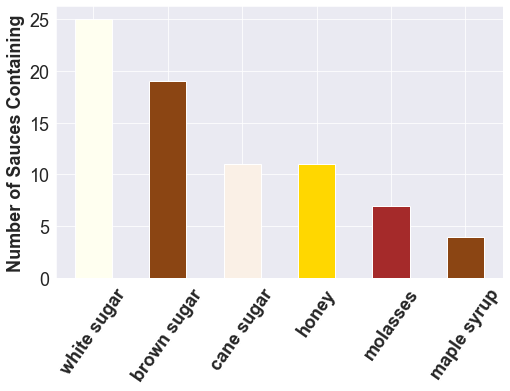

In [71]:
#bow_wnames[sweetenernames].sum(axis=0).plot(kind='bar')
colors=['ivory','saddlebrown','linen','gold','brown','saddlebrown','snow','saddlebrown','saddlebrown']

plt.rcParams['figure.figsize']=(8,5)

bow_wnames[bow_wnames[sweetenernames].sum(axis=0).sort_values(ascending=False)
    .index[:6]].sum(axis=0).plot(kind='bar', color=colors)


plt.ylabel('Number of Sauces Containing', weight='bold')


plt.xlabel('')
plt.xticks(rotation=55, weight='bold', size=18)
plt.show()

In [72]:
bow_wnames[sweetenernames].sum(axis=0).sort_values(ascending=False)

white sugar        25.0
brown sugar        19.0
cane sugar         11.0
honey              11.0
molasses            7.0
maple syrup         4.0
corn syrup          1.0
turbinado sugar     1.0
agave               0.0
dtype: float64

Text(0, 0.5, 'Top 7 Sweetners Coupled with Habanero')

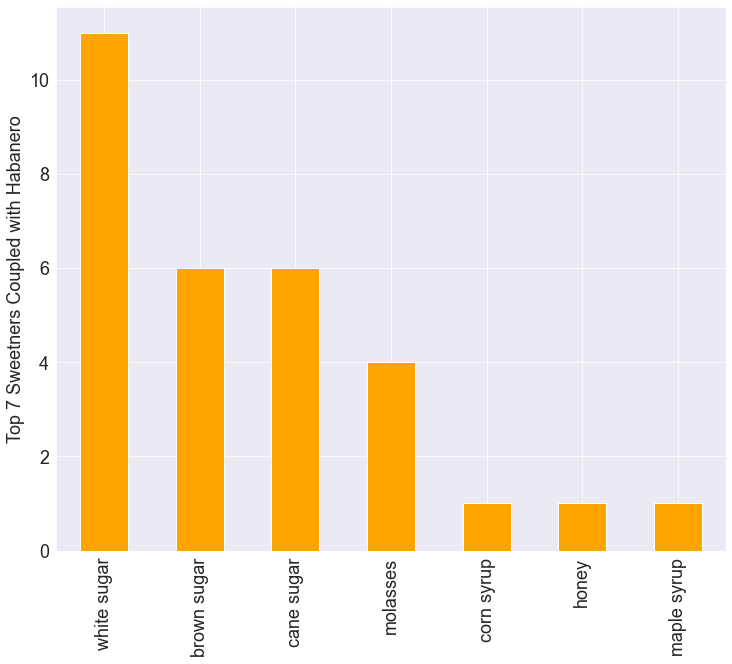

In [73]:
bh = bow_wnames[bow_wnames['habanero'] > 0]
bh[bh[sweetenernames].sum(axis=0).sort_values(ascending=False)
    .index[:7]].sum(axis=0).plot(kind='bar',figsize=(12, 10), color='orange')

plt.ylabel('Top 7 Sweetners Coupled with Habanero')

In [74]:
'''
#test bar
plotdata = pd.DataFrame({
    "pies_2018":[40, 12, 10, 26, 36],
    "pies_2019":[19, 8, 30, 21, 38],
    "pies_2020":[10, 10, 42, 17, 37]
    }, 
    index=["Dad", "Mam", "Bro", "Sis", "Me"]
)
plotdata.transpose().plot(kind="bar")
plt.title("Mince Pie Consumption Study")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")
plotdata.head()
'''

'\n#test bar\nplotdata = pd.DataFrame({\n    "pies_2018":[40, 12, 10, 26, 36],\n    "pies_2019":[19, 8, 30, 21, 38],\n    "pies_2020":[10, 10, 42, 17, 37]\n    }, \n    index=["Dad", "Mam", "Bro", "Sis", "Me"]\n)\nplotdata.transpose().plot(kind="bar")\nplt.title("Mince Pie Consumption Study")\nplt.xlabel("Family Member")\nplt.ylabel("Pies Consumed")\nplotdata.head()\n'

## Ingredient Inspection

### Fruit and Vegetables - Sorting & Figures# 

In [75]:
bow = bow_wnames.copy() #making copies to avoid overwriting 

Text(0, 0.5, 'Number of Sauces Containing')

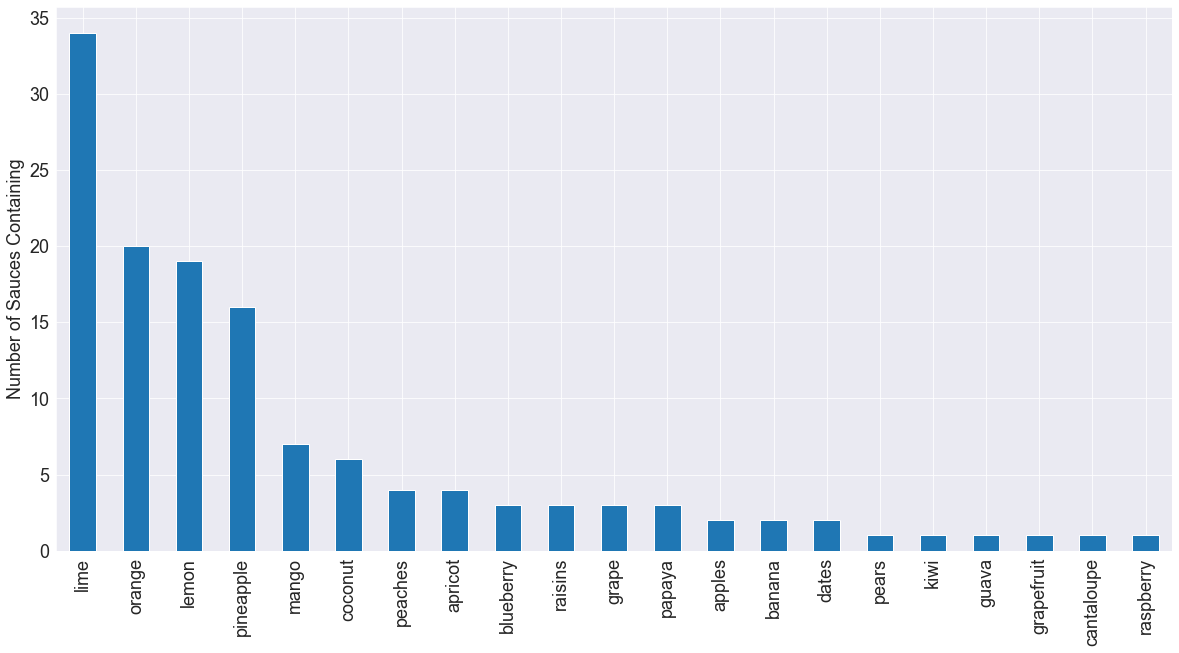

In [76]:
bow[fruitnames].sum(axis=0).sort_values(ascending=False).plot(kind='bar',figsize=(20, 10))

plt.ylabel('Number of Sauces Containing')

Text(0, 0.5, 'Number of Sauces Containing')

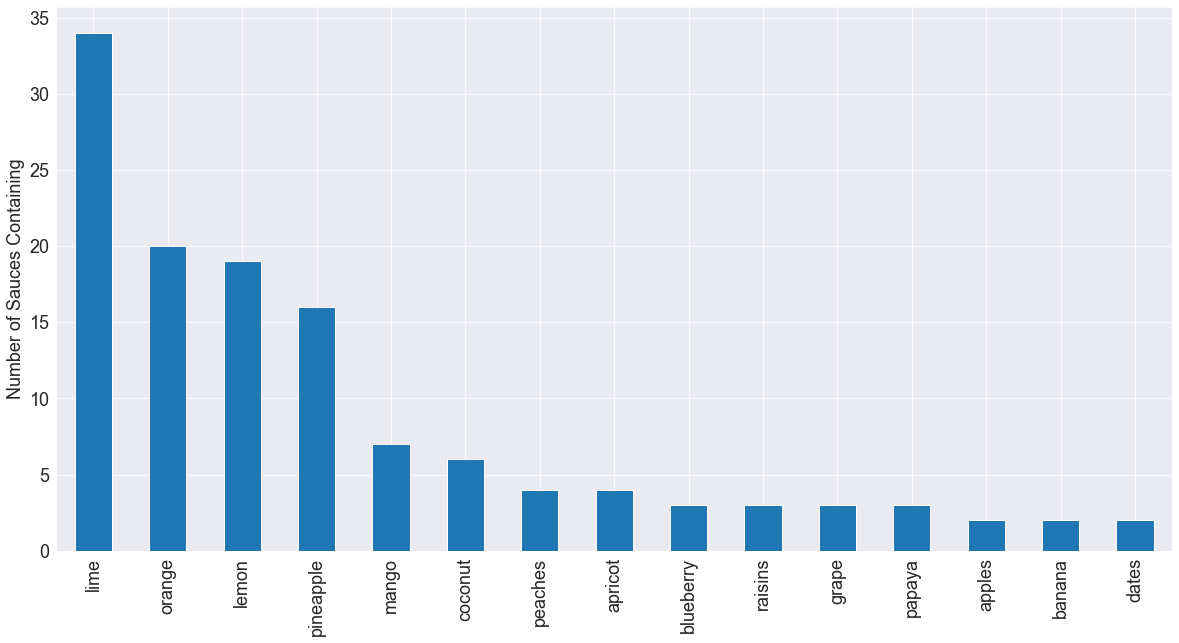

In [77]:
#fruitnames
#vegnames

bow[bow[fruitnames].sum(axis=0).sort_values(ascending=False)
    .index[:15]].sum(axis=0).plot(kind='bar',figsize=(20, 10))

plt.ylabel('Number of Sauces Containing')

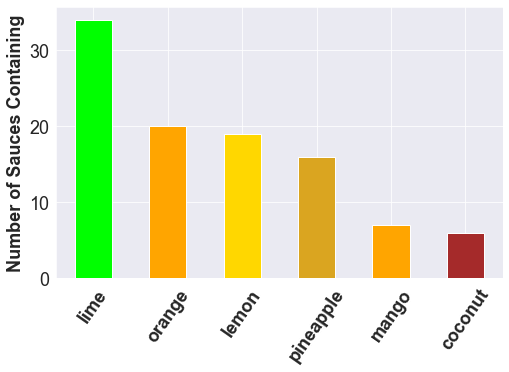

In [78]:
colors=['lime','orange','gold','goldenrod','orange','brown','saddlebrown','snow','saddlebrown','saddlebrown']

plt.rcParams['figure.figsize']=(8,5)

bow[bow[fruitnames].sum(axis=0).sort_values(ascending=False)
    .index[:6]].sum(axis=0).plot(kind='bar',color=colors)


plt.ylabel('Number of Sauces Containing', weight='bold')


plt.xlabel('')
plt.xticks(rotation=55, weight='bold', size=18)
plt.show()

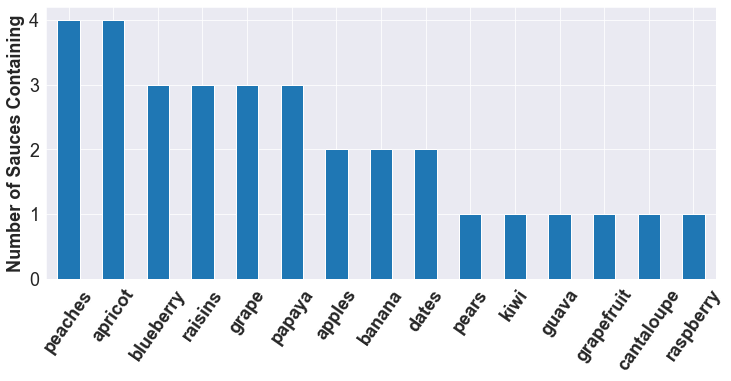

In [79]:
colors=['lime','orange','gold','goldenrod','orange','brown','saddlebrown','snow','saddlebrown','saddlebrown']

plt.rcParams['figure.figsize']=(12,5)

bow[bow[fruitnames].sum(axis=0).sort_values(ascending=False)
    .index[6:]].sum(axis=0).plot(kind='bar')


plt.ylabel('Number of Sauces Containing', weight='bold')


plt.xlabel('')
plt.xticks(rotation=55, weight='bold', size=18)
plt.show()

Text(0, 0.5, 'Top 8 Fruits Coupled with Habanero')

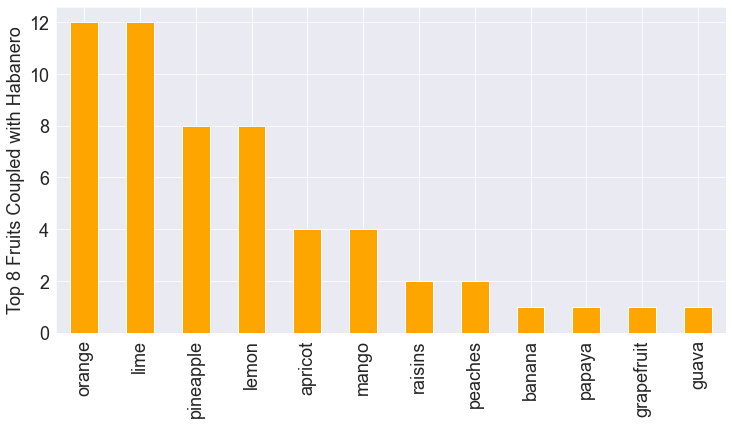

In [80]:
bh = bow[bow['habanero'] > 0]
bh[bh[fruitnames].sum(axis=0).sort_values(ascending=False).index[:12]].sum(axis=0).plot(kind='bar',figsize=(12, 6), color='orange')
plt.ylabel('Top 8 Fruits Coupled with Habanero')

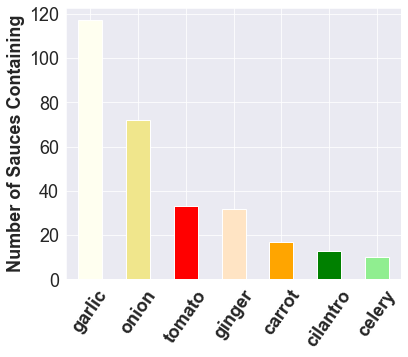

In [81]:

colors=['ivory', 'khaki', 'red', 'bisque', 'orange', 'green', 'lightgreen']




plt.rcParams['figure.figsize']=(6,5)

bow[bow[vegnames].sum(axis=0).sort_values(ascending=False)
    .index[:7]].sum(axis=0).plot(kind='bar', color=colors)


plt.ylabel('Number of Sauces Containing', weight='bold')


plt.xlabel('')
plt.xticks(rotation=55, weight='bold', size=18)
plt.show()

In [82]:
bow[vegnames].sum(axis=0).sort_values(ascending=False)

garlic         117
onion           72
tomato          33
ginger          32
carrot          17
cilantro        13
celery          10
tomatillo        6
horseradish      4
mushroom         3
shallots         2
squash           1
avocado          1
olives           1
beets            1
collard          1
chives           1
greens           1
dtype: int64

Text(0.5, 0, 'Number of Sauces Containing')

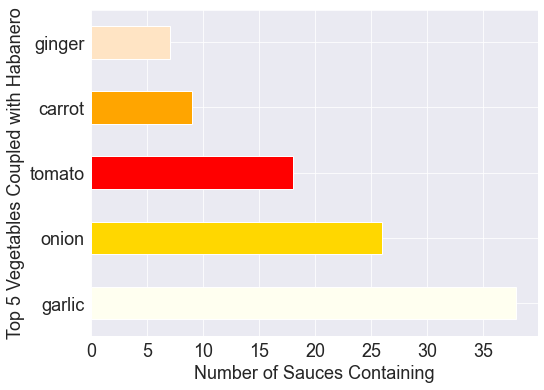

In [83]:
#bh[bh[vegnames].sum(axis=0).sort_values(ascending=False)
bh[bh[vegnames].sum(axis=0).sort_values(ascending=False)
    .index[:5]].sum(axis=0).plot(kind='barh',figsize=(8, 6), 
                                 color=['ivory', 'gold', 'red', 'orange', 'bisque'])

plt.ylabel('Top 5 Vegetables Coupled with Habanero')
plt.xlabel('Number of Sauces Containing')

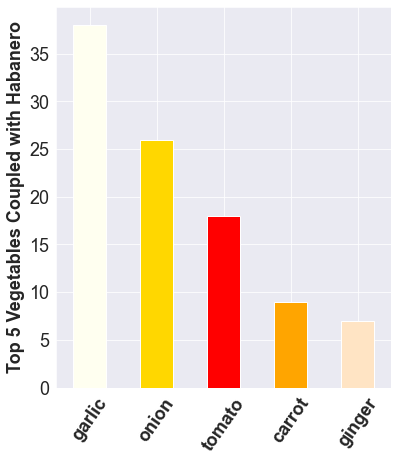

In [84]:
colors=['ivory', 'gold', 'red', 'orange', 'bisque']

plt.rcParams['figure.figsize']=(6,7)

bh[bh[vegnames].sum(axis=0).sort_values(ascending=False)
    .index[:5]].sum(axis=0).plot(kind='bar', color=colors)


plt.ylabel('Top 5 Vegetables Coupled with Habanero', weight='bold')


plt.xlabel('')
plt.xticks(rotation=55, weight='bold', size=18)
plt.show()

# Addition Figures & Calculations

In [85]:
av_bow = bow_wnames[bow_wnames['apple cider vinegar'] > 0] #isolate ASV

wh_bow = bow_wnames[bow_wnames['white vinegar'] > 0] #isolate white vinegar

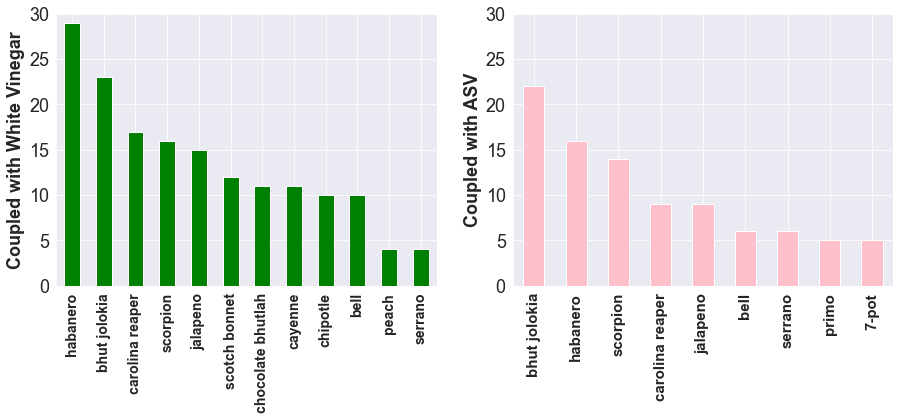

In [86]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)

wh_bow[wh_bow[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[0:12]].sum(axis=0).plot(kind='bar', color='green')

plt.ylabel('Coupled with White Vinegar', weight='bold')

plt.xticks(rotation=90, weight='bold', size=14)

plt.ylim(0,30)

plt.subplot(1, 2, 2)

av_bow[av_bow[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[0:9]].sum(axis=0).plot(kind='bar', color='pink')

plt.ylabel('Coupled with ASV', weight='bold')

plt.xticks(rotation=90, weight='bold', size=15)

plt.ylim(0,30)

plt.show()

In [87]:
sugar_bow = bow_wnames[bow_wnames['white sugar'] > 0] #isolate white sugar

nosugar_bow = bow_wnames[bow_wnames['white sugar'] < 1] #no white sugar

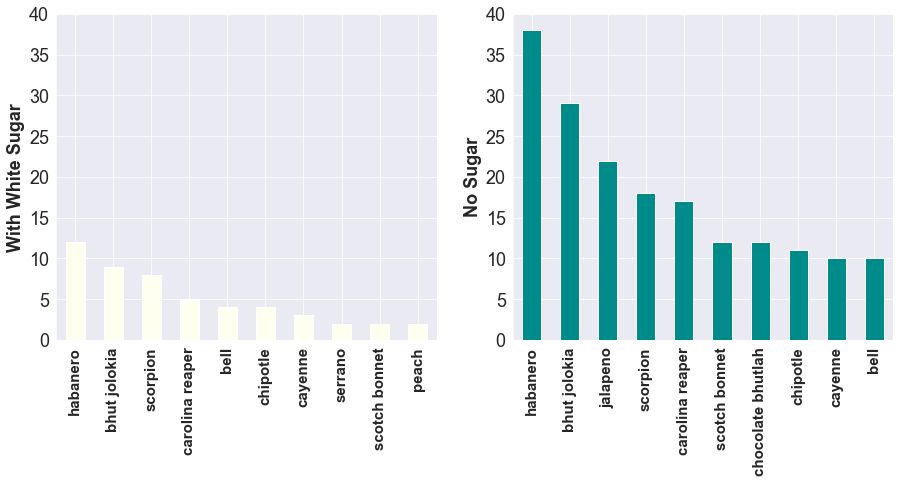

In [88]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)

sugar_bow[sugar_bow[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[0:10]].sum(axis=0).plot(kind='bar', color='ivory')

plt.ylabel('With White Sugar', weight='bold')

plt.ylim(0,40)
plt.xticks(rotation=90, weight='bold', size=15)


plt.subplot(1, 2, 2)

nosugar_bow[nosugar_bow[new_peppernames].sum(axis=0).sort_values(ascending=False)
    .index[0:10]].sum(axis=0).plot(kind='bar', color='darkcyan')

plt.ylabel('No Sugar', weight='bold')

plt.ylim(0,40)
plt.xticks(rotation=90, weight='bold', size=15)


plt.show()

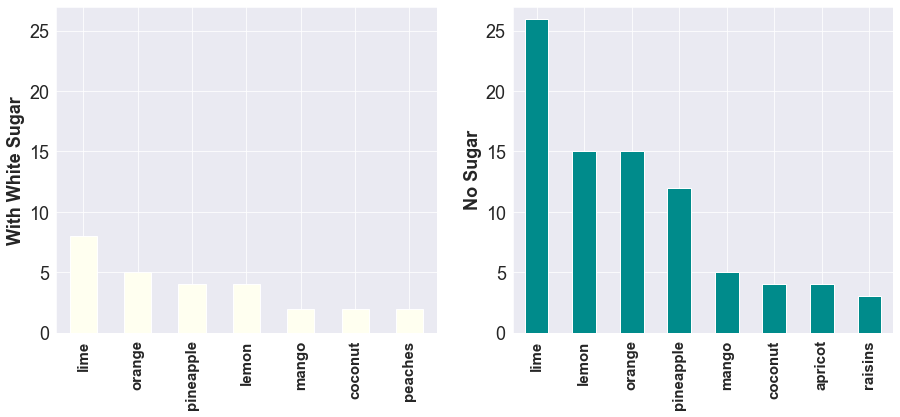

In [89]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)

sugar_bow[sugar_bow[fruitnames].sum(axis=0).sort_values(ascending=False)
    .index[0:7]].sum(axis=0).plot(kind='bar', color='ivory')

plt.ylabel('With White Sugar', weight='bold')

plt.ylim(0,27)

plt.xticks(rotation=90, weight='bold', size=15)

plt.subplot(1, 2, 2)

nosugar_bow[nosugar_bow[fruitnames].sum(axis=0).sort_values(ascending=False)
    .index[0:8]].sum(axis=0).plot(kind='bar', color='darkcyan')

plt.ylabel('No Sugar', weight='bold')

plt.ylim(0,27)

plt.xticks(rotation=90, weight='bold', size=15)

plt.show()

### maybe a lime, lemon "juice" problem ^

In [90]:
#df_sweetvin = 

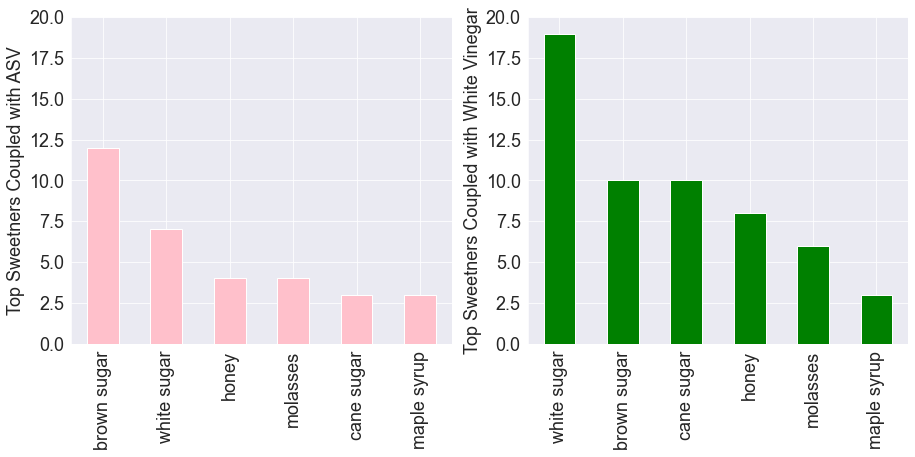

In [91]:
plt.figure(figsize=(15, 6))

plt.subplot(1, 2, 1)

av_bow[av_bow[sweetenernames].sum(axis=0).sort_values(ascending=False)
    .index[0:6]].sum(axis=0).plot(kind='bar', color='pink')

plt.ylabel('Top Sweetners Coupled with ASV')

plt.ylim(0,20)

plt.subplot(1, 2, 2)

wh_bow[wh_bow[sweetenernames].sum(axis=0).sort_values(ascending=False)
    .index[0:6]].sum(axis=0).plot(kind='bar', color='green')

plt.ylabel('Top Sweetners Coupled with White Vinegar')

plt.ylim(0,20)

plt.show()

In [92]:
wh_bow[sweetenernames].sum(axis=0)

agave               0.0
brown sugar        10.0
cane sugar         10.0
corn syrup          1.0
honey               8.0
maple syrup         3.0
molasses            6.0
white sugar        19.0
turbinado sugar     0.0
dtype: float64

In [93]:
med_SHU = bow_wnames['Scoville Rating (SHU)'].median()

In [94]:
#bow_wnames[bow_wnames['Scoville Rating (SHU)'] >= med_SHU][new_peppernames].sum(axis=0).sort_values(ascending=False)

# Find Median SHU featuring each pepper (In Progress)

In [95]:
np = len(new_peppernames) #number of peppers

In [96]:
bow_wnames[bow_wnames['habanero']==1][['Scoville Rating (SHU)']].median()[0]

31000.0

In [97]:
# print(new_peppernames[i], 
for i in range(np):
    print(bow_wnames[bow_wnames[new_peppernames[i]]==1][['Scoville Rating (SHU)']].max()[0],new_peppernames[i])

649000 7-pot
66000 adobo
4000 aji
116000 aka
4000 amarillo
72000 anaheim
550000 ancho
nan apollo
8800 arbol
101000 bell
1000000 bhut jolokia
99000 bird
15700 calabrian
112000 capsicum
1000000 carolina reaper
550000 cayenne
42000 cherry
669000 chipotle
2000000 chocolate bhutlah
39000 datil
25300 fatalli
nan fijian bongo
1700 fresno
67000 guajillo
649000 habanero
104000 hatari
118000 jalapeno
121000 jigsaw
18000 manzano
71000 pasilla
2000000 peach
3900 pepperoncini
2000000 pepperx
104000 piquin
649000 primo
1000000 scorpion
118000 scotch bonnet
638000 serrano
6200 sivathei
4000 tabasco
104000 tepin


# More questions to investigate:

#### The hottest sauces use what kind(s) of peppers?

#### Xanthum Gum?

##### *maybe* preservatives

#### rarest ingredients? go through list of things that only shows up once